In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Read weekly sales by postcode sheet
weekly_sales_pcode=pd.read_csv('Weekly Sales by Postcode.csv',encoding='latin1')
weekly_sales_pcode.drop(['Unnamed: 4',	'Unnamed: 5'],axis=1,inplace=True)

In [3]:
# Explore weekly sales by postcode sheet

print(weekly_sales_pcode.head())
print('')
print(weekly_sales_pcode.info())
print('')
print(weekly_sales_pcode.describe(include='all'))

   Week Start Postcode First Letters  Total Bb New Customer  \
0  05/01/2023                     BD                     54   
1  05/01/2023                     BH                     46   
2  05/01/2023                     BL                     27   
3  05/01/2023                     BN                     59   
4  05/01/2023                     BT                    140   

  Total Order Net Revenue  
0                  £2,126  
1                  £1,783  
2                  £1,097  
3                  £2,304  
4                  £5,182  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Week Start               1332 non-null   object
 1   Postcode First Letters   1332 non-null   object
 2   Total Bb New Customer    1332 non-null   int64 
 3   Total Order Net Revenue  1332 non-null   object
dtypes: int64(1), object(3)


In [4]:
# Rename columns
weekly_sales_pcode = weekly_sales_pcode.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [5]:
# Re-format revenue to number
weekly_sales_pcode['total_order_net_revenue']=weekly_sales_pcode['total_order_net_revenue'].str.replace('£','').str.replace(',','').astype(int)

In [6]:
weekly_sales_pcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   week_start               1332 non-null   object
 1   postcode_first_letters   1332 non-null   object
 2   total_bb_new_customer    1332 non-null   int64 
 3   total_order_net_revenue  1332 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 36.6+ KB


In [7]:
# Read and explore Postcode Mapping sheet
pcode_map=pd.read_csv('Postcode Mapping.csv',encoding='latin1')
pcode_map.drop('Unnamed: 5',axis=1,inplace=True)

print(pcode_map.head())
print('')
print(pcode_map.info())
print('')
print(pcode_map.describe(include='all'))

  postcode_first_part postcode_first_letters  Num_People market_group  \
0                BN20                     BN       16479      Group A   
1                 ME3                     ME       23769      Group B   
2                 SK6                     SK       39750      Group A   
3                 NN8                     NN       42753      Group A   
4                 CO3                     CO       25913      Group B   

   < 500 People Flag  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   postcode_first_part     1879 non-null   object 
 1   postcode_first_letters  1879 non-null   object 
 2   Num_People              1879 non-null   int64  
 3   market_group            1879 non-null   object

In [8]:
# Read and explore Campaign Delivery Data sheet
campaign_del_data=pd.read_csv('Campaign Delivery Data.csv',encoding='latin1')

In [9]:
campaign_del_data.head()

,Account,Adset,Postal Code,Budget Delivered (Local),Impressions,Clicks,View Conversions,Click Conversions,Total Conversions,Viewability,Video Completion Rate,Total Revenue,CTR,CPA (Local),ROAS,Postcode Area,Matched Market Test Group
0,Sky,Experimental Ad Set A- Cookie Pool Cell A- 4pw,ab10,3.299428,3715,1,0,0,0,0.523072,0,0,0.000269,0.0,0,AB,Group B
1,Sky,Experimental Ad Set B- Cookie Pool Cell B- No ...,ab10,3.302499,3800,0,0,0,0,0.547079,0,0,0.000000,0.0,0,AB,Group B
2,Sky,High Frequency Audience- GroupA,ab10,6.084130,5682,3,0,0,0,0.560219,0,0,0.000528,0.0,0,AB,Group B
3,Sky,Low Frequency Audience_GroupB,ab10,45.879473,47053,9,0,0,0,0.570572,0,0,0.000191,0.0,0,AB,Group B
4,Sky,Experimental Ad Set A- Cookie Pool Cell A- 4pw,ab11,4.985983,5433,0,0,0,0,0.511178,0,0,0.000000,0.0,0,AB,Group B


In [10]:
campaign_del_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11557 entries, 0 to 11556
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Account                    11557 non-null  object 
 1   Adset                      11557 non-null  object 
 2   Postal Code                11553 non-null  object 
 3   Budget Delivered (Local)   11557 non-null  float64
 4   Impressions                11557 non-null  int64  
 5   Clicks                     11557 non-null  int64  
 6   View Conversions           11557 non-null  int64  
 7   Click Conversions          11557 non-null  int64  
 8   Total Conversions          11557 non-null  int64  
 9   Viewability                11557 non-null  float64
 10  Video Completion Rate      11557 non-null  int64  
 11  Total Revenue              11557 non-null  int64  
 12  CTR                        11557 non-null  float64
 13  CPA (Local)                11557 non-null  flo

In [11]:
campaign_del_data.describe(include='all')

,Account,Adset,Postal Code,Budget Delivered (Local),Impressions,Clicks,View Conversions,Click Conversions,Total Conversions,Viewability,Video Completion Rate,Total Revenue,CTR,CPA (Local),ROAS,Postcode Area,Matched Market Test Group
count,11557,11557,11553,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.0,11557.0,11557.000000,11557.000000,11557.0,11553,11557
unique,1,4,2990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164,3
top,Sky,Low Frequency Audience_GroupB,ab10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BT,Group B
freq,11557,2911,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,318,4082
mean,NaN,NaN,NaN,11.919366,12329.523060,2.929220,0.083672,0.000433,0.084105,0.532958,0.0,0.0,0.000209,1.499797,0.0,NaN,NaN
std,NaN,NaN,NaN,25.560779,26853.277387,11.144035,0.492949,0.020796,0.493314,0.100723,0.0,0.0,0.000509,12.654045,0.0,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,NaN,NaN
25%,NaN,NaN,NaN,0.865046,796.000000,0.000000,0.000000,0.000000,0.000000,0.499007,0.0,0.0,0.000000,0.000000,0.0,NaN,NaN
50%,NaN,NaN,NaN,3.183085,3147.000000,1.000000,0.000000,0.000000,0.000000,0.549752,0.0,0.0,0.000084,0.000000,0.0,NaN,NaN
75%,NaN,NaN,NaN,10.710979,10861.000000,3.000000,0.000000,0.000000,0.000000,0.581259,0.0,0.0,0.000270,0.000000,0.0,NaN,NaN


In [12]:
campaign_del_data.groupby('Adset').agg({'Budget Delivered (Local)': 'sum', 'Impressions': 'sum'}).reset_index()

,Adset,Budget Delivered (Local),Impressions
0,Experimental Ad Set A- Cookie Pool Cell A- 4pw,13773.365429,14840697
1,Experimental Ad Set B- Cookie Pool Cell B- No ...,13773.992147,15138609
2,High Frequency Audience- GroupA,55099.607328,56649570
3,Low Frequency Audience_GroupB,55105.149169,55863422


#### As expected, similar budget has been allocated for each group (testing vs control) in each of the two tests 

In [13]:
del_data_by_market_camp=campaign_del_data.groupby(['Adset','Matched Market Test Group']).agg({'Budget Delivered (Local)': 'sum', 'Impressions': 'sum'}).reset_index().sort_values(by=['Matched Market Test Group','Adset'])
del_data_by_market_camp

,Adset,Matched Market Test Group,Budget Delivered (Local),Impressions
0,Experimental Ad Set A- Cookie Pool Cell A- 4pw,Group A,1532.574344,1719115
3,Experimental Ad Set B- Cookie Pool Cell B- No ...,Group A,1536.451331,1772089
6,High Frequency Audience- GroupA,Group A,43156.518368,45267005
9,Low Frequency Audience_GroupB,Group A,5663.566707,5410309
1,Experimental Ad Set A- Cookie Pool Cell A- 4pw,Group B,1497.688060,1684080
4,Experimental Ad Set B- Cookie Pool Cell B- No ...,Group B,1514.413502,1753653
7,High Frequency Audience- GroupA,Group B,5622.652031,5495760
10,Low Frequency Audience_GroupB,Group B,42884.536157,44543383
2,Experimental Ad Set A- Cookie Pool Cell A- 4pw,Not In Test,10743.103025,11437502
5,Experimental Ad Set B- Cookie Pool Cell B- No ...,Not In Test,10723.127315,11612867


#### A first problem seems to be occuring here: Areas (postcode first two letters) that were meant to be allocated for Group A seem to have some budget delivered for Group B audience (Low Frequency) and vice versa, whereas we can also seen both these groups in "Not in Matched Market Test" areas. The graph below will reveal the extent of the issue

<function matplotlib.pyplot.show(close=None, block=None)>

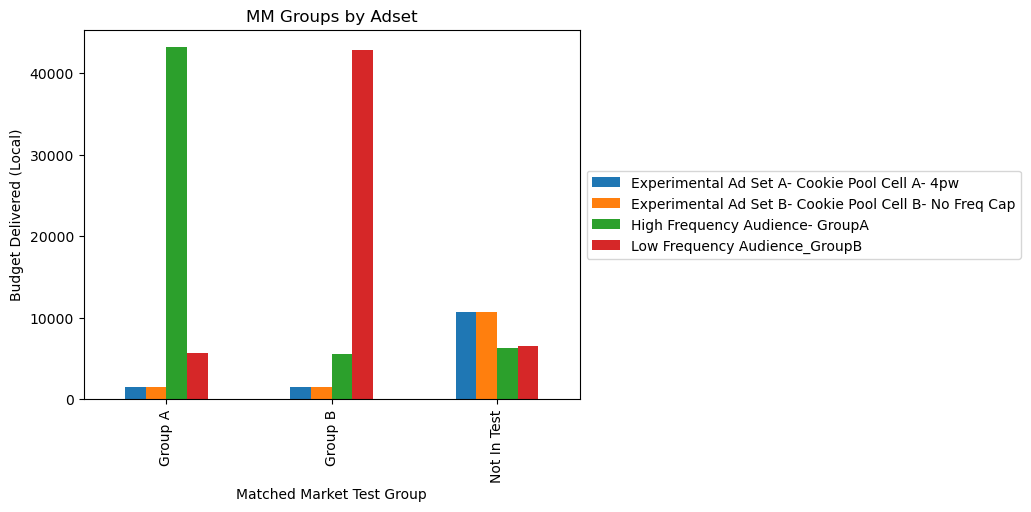

In [14]:
pivot_data = del_data_by_market_camp.pivot(index='Matched Market Test Group', columns='Adset', values='Budget Delivered (Local)')

# Plotting the grouped bar chart

ax=pivot_data.plot(kind='bar', stacked=False)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Budget Delivered (Local)')
plt.title('MM Groups by Adset')

plt.show

* Both in Group A and Group B areas the vast majority of the budget has been allocated to the relevant group plus the in platform test (which is fine), but there is still some budget allocated for the opposite group.
* In the other areas (Not in Test) the biggest amount of budget has been allocated for the in platform test, but Matched Market test groups have been allocated a budget which is roughly half of that of in platform test



#### Let's answer the question 'how Test 2 groups were selected'

In [15]:
pcode_map.groupby('market_group')['postcode_first_letters'].nunique().reset_index()

,market_group,postcode_first_letters
0,Group A,37
1,Group B,37


In [16]:
pcode_map.groupby('postcode_first_letters')['market_group'].nunique().reset_index().sort_values(by='market_group',ascending=False)

,postcode_first_letters,market_group
0,AB,1
55,SG,1
53,S,1
52,RH,1
51,RG,1
...,...,...
24,G,1
23,FY,1
22,FK,1
21,EX,1


#### As it seems above there are 37 areas (defined by the first two letters of the postcode) assigned to each group and no area was assign to more than one groups. So we have 37 areas each.

In [17]:
campaign_del_data.groupby('Matched Market Test Group')['Postcode Area'].nunique()

Matched Market Test Group
Group A        37
Group B        37
Not In Test    90
Name: Postcode Area, dtype: int64

In [18]:
campaign_del_data.groupby('Postcode Area')['Matched Market Test Group'].nunique().reset_index().sort_values(by='Matched Market Test Group',ascending=False)

,Postcode Area,Matched Market Test Group
0,AB,1
103,OL,1
105,P,1
106,PA,1
107,PB,1
...,...,...
55,HD,1
56,HG,1
57,HM,1
58,HP,1


#### There are also another 90 areas not allocated for any of the two groups in the Matched Market test

#### Let's dive deeper in these 37 areas for each group

In [19]:
groups_count=pcode_map.groupby('market_group')['Num_People'].sum().reset_index(name='people')
groups_count

,market_group,people
0,Group A,17457524
1,Group B,17119885


#### Slightly more people in Group A

In [20]:
# Let's see how those people are allocated by postcode (first two letters)
pd.set_option('display.max_rows',None)
groups_pc_count=pcode_map.groupby(['market_group','postcode_first_letters'])['Num_People'].sum().reset_index(name='people')
groups_pc_count=groups_pc_count.sort_values(by=['market_group','people'],ascending=[True,False])
groups_pc_count

,market_group,postcode_first_letters,people
4,Group A,BT,1380791
25,Group A,S,1111461
19,Group A,NE,920757
7,Group A,CV,713793
23,Group A,RG,667980
16,Group A,LS,656117
3,Group A,BN,650706
11,Group A,GU,594426
20,Group A,NN,577119
29,Group A,SO,540773


In [21]:
# Put two groups side by side and sort postcodes by people  
groupA_count=groups_pc_count[groups_pc_count['market_group']=='Group A'].reset_index().drop('index',axis=1)
groupB_count=groups_pc_count[groups_pc_count['market_group']=='Group B'].reset_index().drop('index',axis=1)
groups_count_comp=pd.merge(groupA_count,groupB_count,left_index=True,right_index=True)
groups_count_comp

,market_group_x,postcode_first_letters_x,people_x,market_group_y,postcode_first_letters_y,people_y
0,Group A,BT,1380791,Group B,G,952630
1,Group A,S,1111461,Group B,NG,946243
2,Group A,NE,920757,Group B,LE,824871
3,Group A,CV,713793,Group B,CF,817718
4,Group A,RG,667980,Group B,PE,767459
5,Group A,LS,656117,Group B,EH,716807
6,Group A,BN,650706,Group B,PO,675128
7,Group A,GU,594426,Group B,DN,610291
8,Group A,NN,577119,Group B,DE,596734
9,Group A,SO,540773,Group B,SA,592401


In [22]:
pd.set_option('display.max_rows',20)

#### So let's visualise the information above

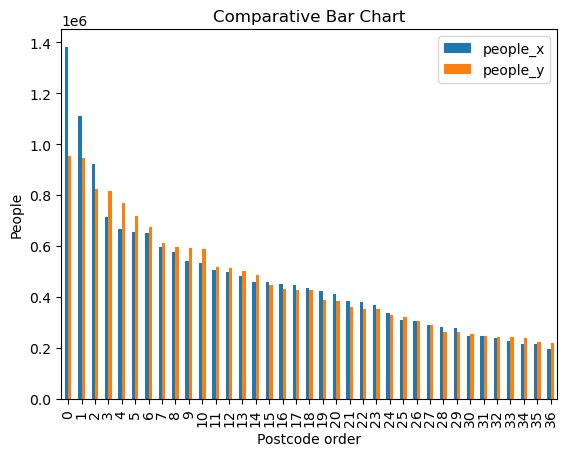

In [23]:

groups_count_comp.plot(kind='bar')

# Add labels and title
plt.xlabel('Postcode order')
plt.ylabel('People')
plt.title('Comparative Bar Chart')

# Display the chart
plt.show()

#### A second problem seems to exist here. Top 3 areas in Group A have significantly more people than the corresponding in Group B (then in next few ones Group B is bigger to balance things). Maybe one of the top 3 should be swapped betweem groups to balance earlier. 

#### Let's see if the situation in terms of spending behaviour BEFORE the test is similar (the 37 areas should have the roughly the same sales)

In [24]:
# Re-format week from object
weekly_sales_pcode['week_start']=pd.to_datetime(weekly_sales_pcode['week_start'],format='%d/%m/%Y')

In [25]:
# Mapping of postcode first letters to groups comes from the relevant sheet
pcode_groups=pcode_map[['postcode_first_letters','market_group']].drop_duplicates()

In [26]:
# Add market group to Weekly Sales by Postcode dataset
weekly_sales_pcode_group=pd.merge(weekly_sales_pcode,pcode_groups)

In [27]:
# Split sales between periods (before and during the test)
weekly_sales_before=weekly_sales_pcode_group[weekly_sales_pcode_group['week_start']<'2023-03-30']
weekly_sales_after=weekly_sales_pcode_group[weekly_sales_pcode_group['week_start']>='2023-03-30']

In [28]:
# Calculate revenue by Market Group and Postcode before the test. Then order by revenue descending
weekly_sales_before_by_pc=weekly_sales_before.groupby(['market_group','postcode_first_letters'])['total_order_net_revenue'].sum().reset_index()
weekly_sales_before_by_pc=weekly_sales_before_by_pc.sort_values(by=['market_group','total_order_net_revenue'],ascending=[True,False])

In [29]:
weekly_sales_before_by_pc

,market_group,postcode_first_letters,total_order_net_revenue
4,Group A,BT,50030
25,Group A,S,42531
19,Group A,NE,40666
7,Group A,CV,27242
16,Group A,LS,26587
...,...,...,...
61,Group B,PA,9652
71,Group B,WR,9197
70,Group B,TR,8280
54,Group B,LA,8257


In [30]:
# Put two groups side by side and sort postcodes by revenue  

weekly_salesA=weekly_sales_before_by_pc[weekly_sales_before_by_pc['market_group']=='Group A'].reset_index().drop('index',axis=1)
weekly_salesB=weekly_sales_before_by_pc[weekly_sales_before_by_pc['market_group']=='Group B'].reset_index().drop('index',axis=1)
weekly_sales_comp=pd.merge(weekly_salesA,weekly_salesB,left_index=True,right_index=True)
weekly_sales_comp

,market_group_x,postcode_first_letters_x,total_order_net_revenue_x,market_group_y,postcode_first_letters_y,total_order_net_revenue_y
0,Group A,BT,50030,Group B,G,44030
1,Group A,S,42531,Group B,NG,37535
2,Group A,NE,40666,Group B,CF,33644
3,Group A,CV,27242,Group B,EH,31165
4,Group A,LS,26587,Group B,PE,29915
...,...,...,...,...,...,...
32,Group A,DD,9418,Group B,PA,9652
33,Group A,TQ,8972,Group B,WR,9197
34,Group A,LU,8702,Group B,TR,8280
35,Group A,HD,7643,Group B,LA,8257


#### Once again visualising should be easier to see

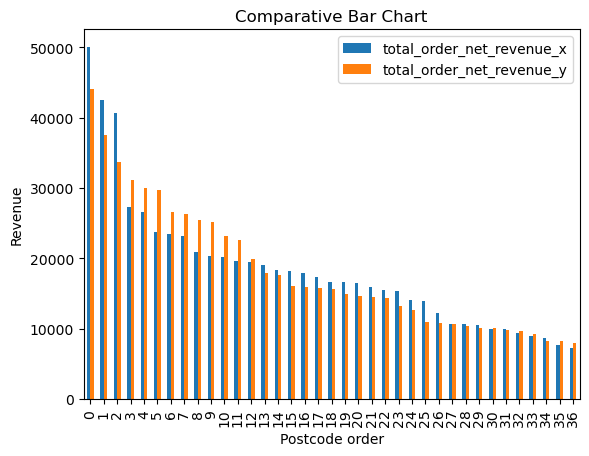

In [31]:

weekly_sales_comp.plot(kind='bar')

# Add labels and title
plt.xlabel('Postcode order')
plt.ylabel('Revenue')
plt.title('Comparative Bar Chart')

# Display the chart
plt.show()

##### Takeaways

* Spending behaviour by area is very similar between the two groups
* But once again top 3 areas in Group A are higher than top 3 ones in group B, mosi likely because as we saw those areas have bigger population.

In [32]:
def rev_per_person(weekly_sales):
    '''
    Function that calculates and returns revenue per person for the whole period or weekly (most important)
    Args: 
    weekly_sales: That would be either weekly sales before or weekly sales after
    Returns: Weekly revenue per person
    '''
    weekly_sales_aggr=weekly_sales.groupby('market_group')['total_order_net_revenue'].sum().reset_index(name='revenue')
    weekly_sales_aggr=pd.merge(weekly_sales_aggr,groups_count)
    weekly_sales_aggr['revenue_per_person']=weekly_sales_aggr.revenue/weekly_sales_aggr.people
    weekly_sales_aggr['revenue_per_person_weekly']=weekly_sales_aggr['revenue_per_person']/weekly_sales['week_start'].nunique()
    return weekly_sales_aggr




In [33]:
# Sales before
weekly_sales_before_details=rev_per_person(weekly_sales_before)
weekly_sales_before_details

,market_group,revenue,people,revenue_per_person,revenue_per_person_weekly
0,Group A,678731,17457524,0.038879,0.003240
1,Group B,674148,17119885,0.039378,0.003282


In [34]:
# Sales after
weekly_sales_after_details=rev_per_person(weekly_sales_after)
weekly_sales_after_details

,market_group,revenue,people,revenue_per_person,revenue_per_person_weekly
0,Group A,318595,17457524,0.018250,0.003042
1,Group B,326260,17119885,0.019057,0.003176


In [35]:
# Put weekly revenue pp before and after side by side
weekly_sales_before_comp=weekly_sales_before_details[['market_group','revenue_per_person_weekly']]
weekly_sales_after_comp=weekly_sales_after_details[['market_group','revenue_per_person_weekly']]

weekly_sales_comp=pd.merge(weekly_sales_before_comp,weekly_sales_after_comp,on='market_group')
weekly_sales_comp=weekly_sales_comp.rename(columns={'revenue_per_person_weekly_x':'weekly_revenue_pp_before','revenue_per_person_weekly_y':'weekly_revenue_pp_after'})
weekly_sales_comp

,market_group,weekly_revenue_pp_before,weekly_revenue_pp_after
0,Group A,0.003240,0.003042
1,Group B,0.003282,0.003176


#### Let's visualise

<function matplotlib.pyplot.show(close=None, block=None)>

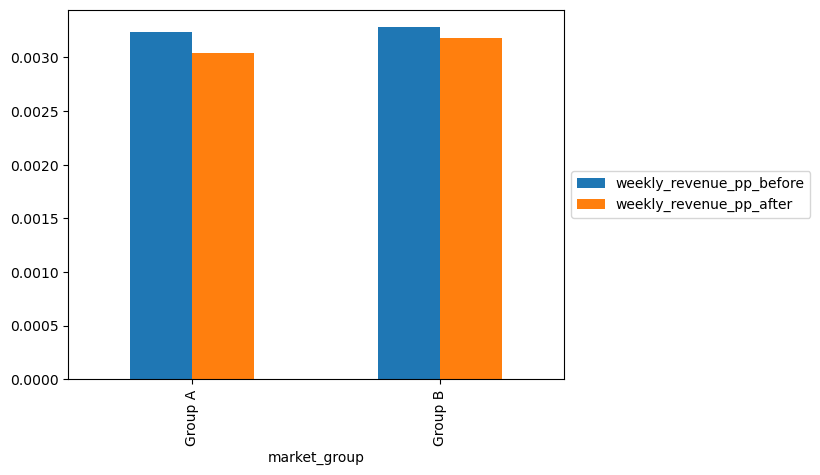

In [36]:

ax=weekly_sales_comp.plot(x='market_group',y=['weekly_revenue_pp_before','weekly_revenue_pp_after'],kind='bar')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show

#### Slighlty decreased sales in both groups after the test started. That could indicate that both the 4 and the 1 ad per week cap are quite low but weh shouldn't forget that these are total sales -not just online - so there is no way we can isolate the effect of the cap on the online sales. Therefore, the principal requirement of a Matched Market Test (keeping everything the same apart from what we are testing) is violated. Campaign Delivery Data sheet should allow for safer inference.   

In [37]:
campaign_del_data.head()

,Account,Adset,Postal Code,Budget Delivered (Local),Impressions,Clicks,View Conversions,Click Conversions,Total Conversions,Viewability,Video Completion Rate,Total Revenue,CTR,CPA (Local),ROAS,Postcode Area,Matched Market Test Group
0,Sky,Experimental Ad Set A- Cookie Pool Cell A- 4pw,ab10,3.299428,3715,1,0,0,0,0.523072,0,0,0.000269,0.0,0,AB,Group B
1,Sky,Experimental Ad Set B- Cookie Pool Cell B- No ...,ab10,3.302499,3800,0,0,0,0,0.547079,0,0,0.000000,0.0,0,AB,Group B
2,Sky,High Frequency Audience- GroupA,ab10,6.084130,5682,3,0,0,0,0.560219,0,0,0.000528,0.0,0,AB,Group B
3,Sky,Low Frequency Audience_GroupB,ab10,45.879473,47053,9,0,0,0,0.570572,0,0,0.000191,0.0,0,AB,Group B
4,Sky,Experimental Ad Set A- Cookie Pool Cell A- 4pw,ab11,4.985983,5433,0,0,0,0,0.511178,0,0,0.000000,0.0,0,AB,Group B


In [38]:
# Aggregate data for each of the groups in each test
del_data_by_camp=campaign_del_data.groupby('Adset').agg({'Budget Delivered (Local)': 'sum', 'Impressions': 'sum','Total Conversions':'sum'}).reset_index()
del_data_by_camp

,Adset,Budget Delivered (Local),Impressions,Total Conversions
0,Experimental Ad Set A- Cookie Pool Cell A- 4pw,13773.365429,14840697,140
1,Experimental Ad Set B- Cookie Pool Cell B- No ...,13773.992147,15138609,123
2,High Frequency Audience- GroupA,55099.607328,56649570,363
3,Low Frequency Audience_GroupB,55105.149169,55863422,346


#### At first glance it seems that: 

* 4pw cap for the in platform test pays off more conversions (140 vs 123) where budget is the same
* High frequency audience in Matched Market test (4pw) returns more conversions than 1pw (363 vs 346) - again with the same budget

#### Let's split and visualise

In [39]:
# Test 1
del_data_test1=del_data_by_camp[del_data_by_camp['Adset'].isin(['Experimental Ad Set A- Cookie Pool Cell A- 4pw','Experimental Ad Set B- Cookie Pool Cell B- No Freq Cap'])]
# Test 2
del_data_test2=del_data_by_camp[~del_data_by_camp['Adset'].isin(['Experimental Ad Set A- Cookie Pool Cell A- 4pw','Experimental Ad Set B- Cookie Pool Cell B- No Freq Cap'])]


#### In platform test first

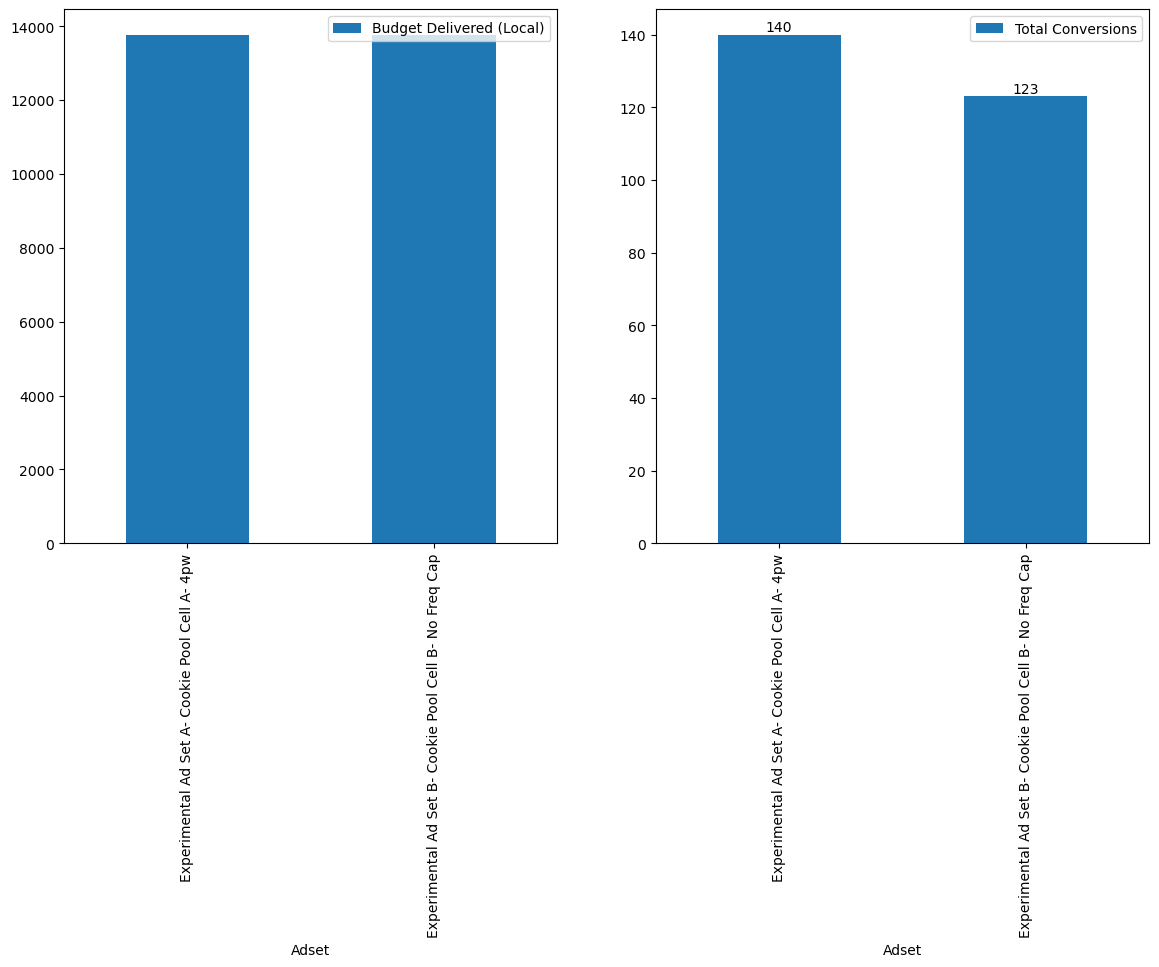

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plt.subplots_adjust(top=1)


del_data_test1.plot(x='Adset',y='Budget Delivered (Local)',kind='bar',ax=axes[0])
del_data_test1.plot(x='Adset',y='Total Conversions',kind='bar',ax=axes[1])
for i, value in enumerate(del_data_test1['Total Conversions']):
                plt.text(i, value, str(value), ha='center', va='bottom')

#### Same budget, higher conversion frequency

### Let's do some Hypothesis Testing though to confirm that 4pw cap leads to significantly higher conversions

In [41]:
n_control = 15138609    # Impressions in control group (no cap)
n_exper = 14840697    # Impressions in test group (4pw cap)
p_null = (140+123)/(n_control+n_exper)    # Under Null hypothesis the conversion rate (or probability of conversion) would be the same in both 
                                          # groups. So let's mix them together and calculate

se_p = np.sqrt(p_null * (1-p_null) * (1/n_control + 1/n_exper))    # Standard deviation under null hypothesis
p_conv_exper=140/n_exper    # Conversion rate in test group 
p_conv_control=123/n_control    # Conversion rate in control group
z_score = (p_conv_exper - p_conv_control) / se_p    # Z score for difference in proportions (the distribution is almost Normal)
p_val = 1-stats.norm.cdf(z_score)    # P-value

print("z-score: {z}".format(z=z_score))
print("p-value from z-score: {p}".format(p=p_val))

z-score: 1.2094851212954123
p-value from z-score: 0.113238261925519


#### P-Value is bigger than 0.05 (even than 0.1) so we can't reject the null hypothesis and safely confirm that there is a statistically significant difference in the conversion rate between the two groups. That probably means that both conversion rates are really low.

#### Let's see Matched Market test

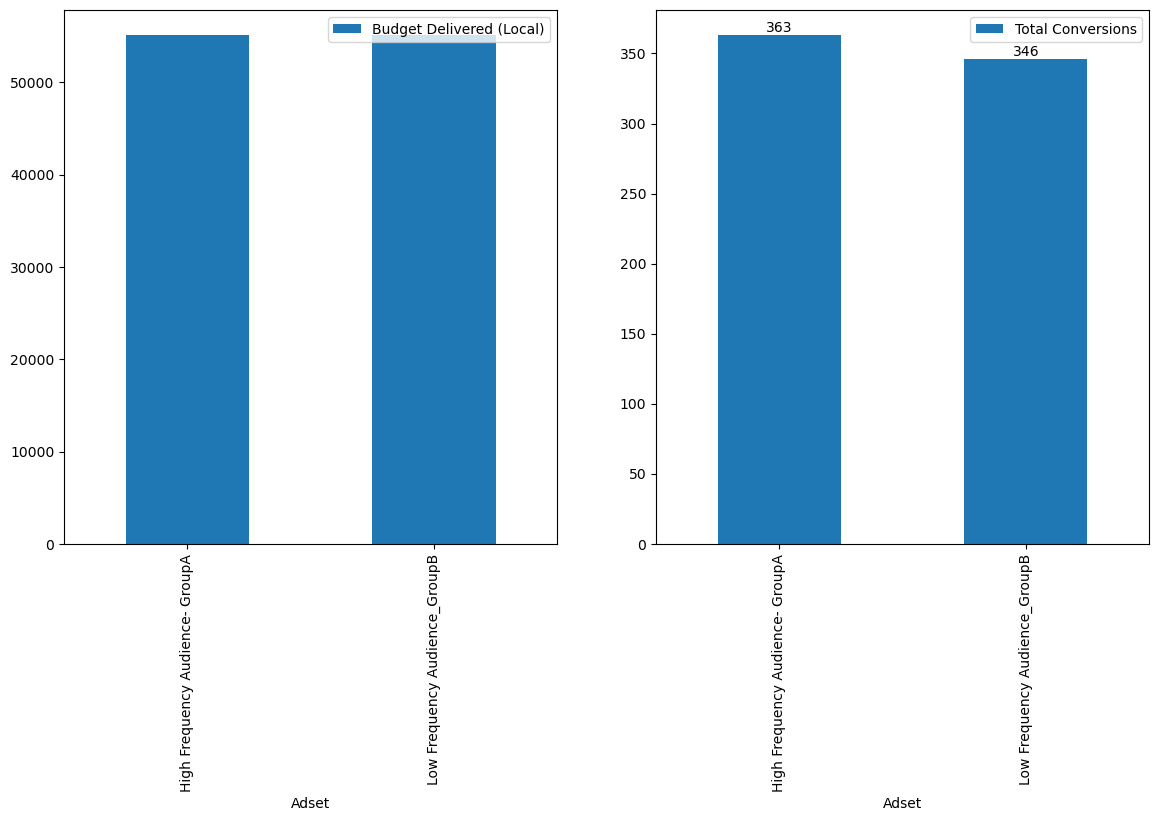

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
plt.subplots_adjust(top=1)  

del_data_test2.plot(x='Adset',y='Budget Delivered (Local)',kind='bar',ax=axes[0])
del_data_test2.plot(x='Adset',y='Total Conversions',kind='bar',ax=axes[1])
for i, value in enumerate(del_data_test2['Total Conversions']):
                plt.text(i, value, str(value), ha='center', va='bottom')

#### Once again same budget but higher conversions for Group A (4pw vs 1pw)

In [43]:
n_control = 55863422    # Impressions in control group (1pw cap)
n_exper = 56649570    # Impressions in test group (4pw cap)
p_null = (363+346)/(n_control+n_exper)    # Under Null hypothesis the conversion rate (or probability of conversion) would be the same in both 
                                          # groups. So let's mix them together and calculate

se_p = np.sqrt(p_null * (1-p_null) * (1/n_control + 1/n_exper))    # Standard deviation under null hypothesis
p_conv_exper=363/n_exper    # Conversion rate in test group 
p_conv_control=346/n_control    # Conversion rate in control group
z_score = (p_conv_exper - p_conv_control) / se_p    # Z score for difference in proportions (the distribution is almost Normal)
p_val = 1-stats.norm.cdf(z_score)    # P-value

print("z-score: {z}".format(z=z_score))
print("p-value from z-score: {p}".format(p=p_val))

z-score: 0.45241297661701557
p-value from z-score: 0.32548575013960224


#### Same inference here. Hypothesis testing doesn't confirm that there is a significant increase in conversion.

#### Finally let's breakdown the in platform test by Matched Market Test Area

In [44]:
del_data_by_market_camp=campaign_del_data.groupby(['Adset','Matched Market Test Group']).agg({'Budget Delivered (Local)': 'sum', 'Impressions': 'sum','Total Conversions':'sum'}).reset_index().sort_values(by=['Matched Market Test Group','Adset'])

In [45]:
del_data_by_market_camp

,Adset,Matched Market Test Group,Budget Delivered (Local),Impressions,Total Conversions
0,Experimental Ad Set A- Cookie Pool Cell A- 4pw,Group A,1532.574344,1719115,24
3,Experimental Ad Set B- Cookie Pool Cell B- No ...,Group A,1536.451331,1772089,19
6,High Frequency Audience- GroupA,Group A,43156.518368,45267005,240
9,Low Frequency Audience_GroupB,Group A,5663.566707,5410309,48
1,Experimental Ad Set A- Cookie Pool Cell A- 4pw,Group B,1497.688060,1684080,26
4,Experimental Ad Set B- Cookie Pool Cell B- No ...,Group B,1514.413502,1753653,22
7,High Frequency Audience- GroupA,Group B,5622.652031,5495760,62
10,Low Frequency Audience_GroupB,Group B,42884.536157,44543383,262
2,Experimental Ad Set A- Cookie Pool Cell A- 4pw,Not In Test,10743.103025,11437502,90
5,Experimental Ad Set B- Cookie Pool Cell B- No ...,Not In Test,10723.127315,11612867,82


In [46]:
# Isolate Test 1
del_data_mark_test1=del_data_by_market_camp[del_data_by_market_camp['Adset'].isin(['Experimental Ad Set A- Cookie Pool Cell A- 4pw','Experimental Ad Set B- Cookie Pool Cell B- No Freq Cap'])]


#### Let's see how conversion behave across these groups

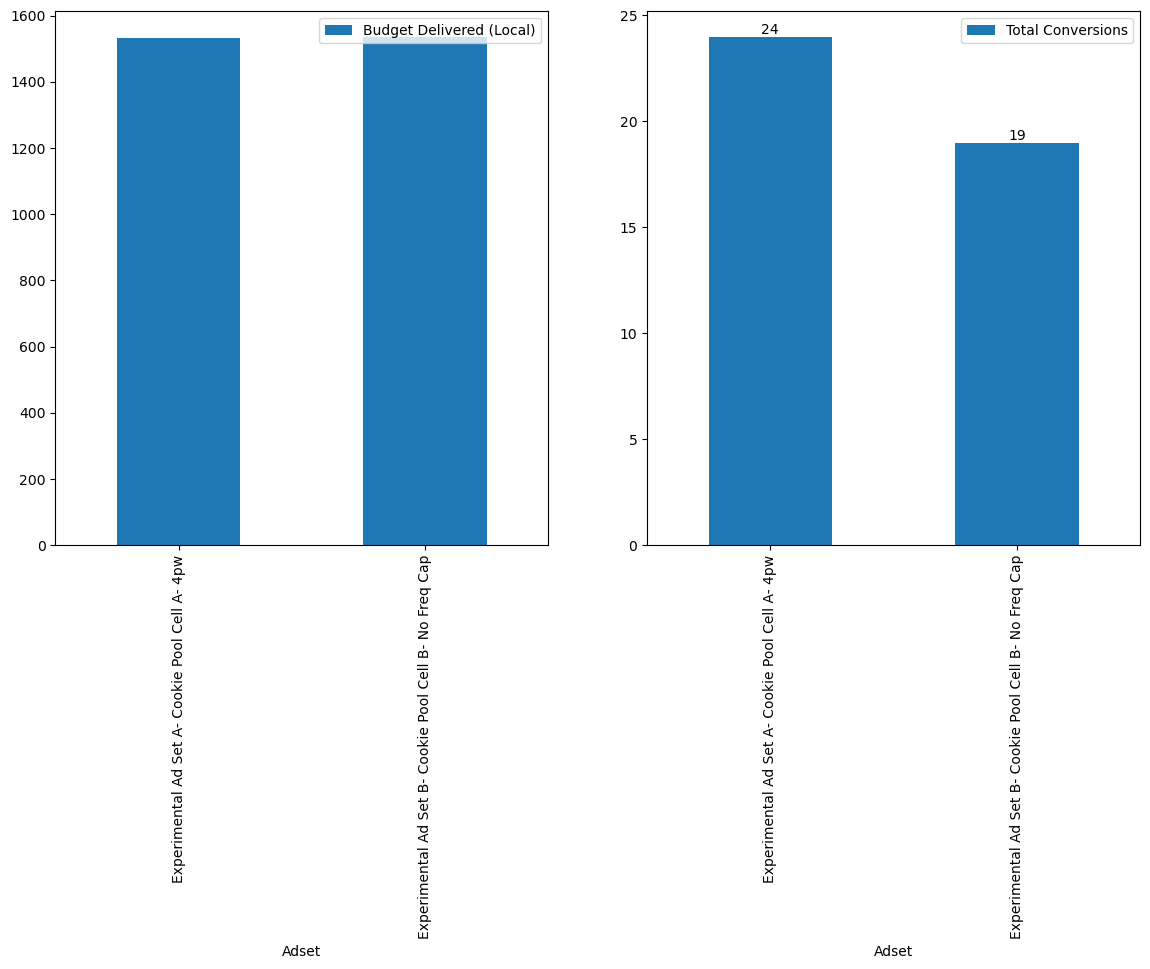

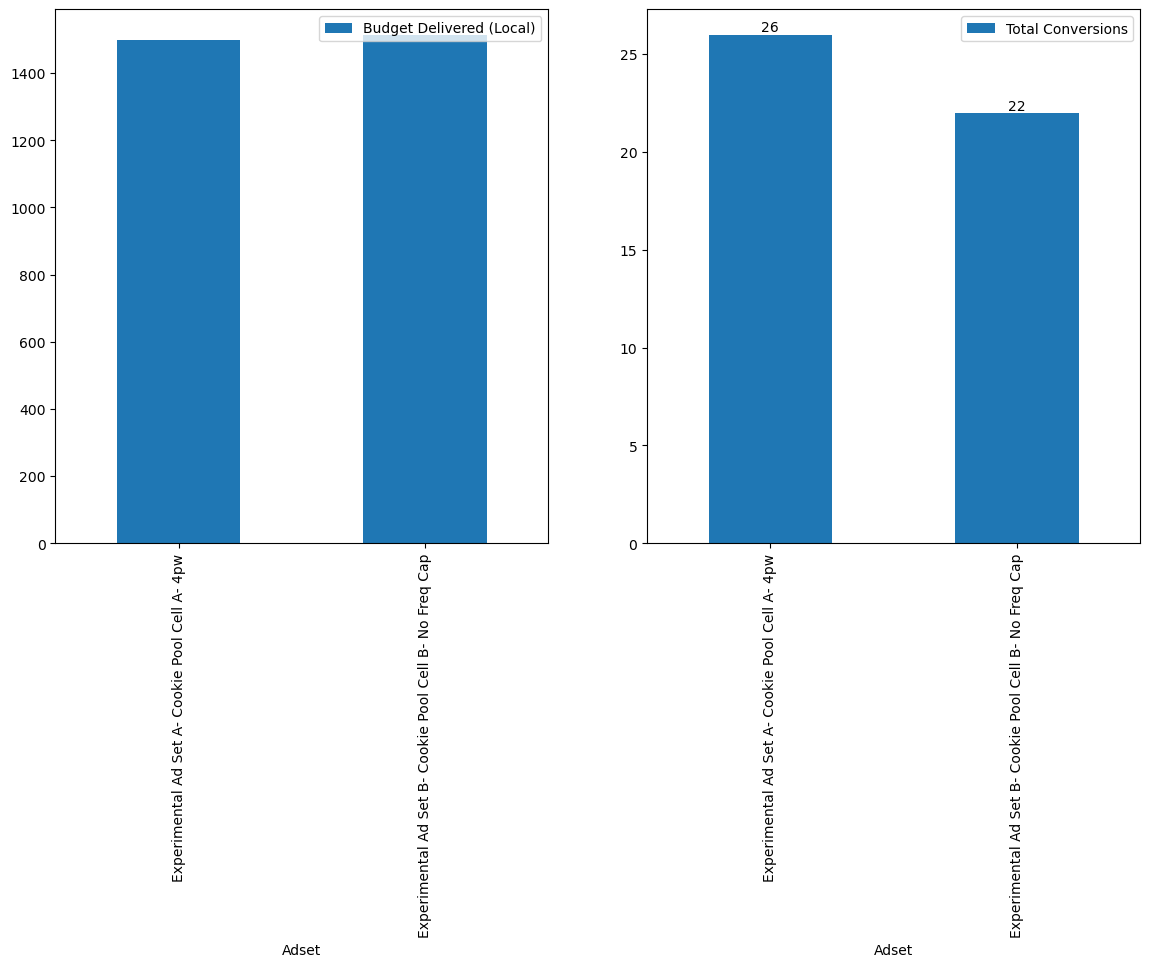

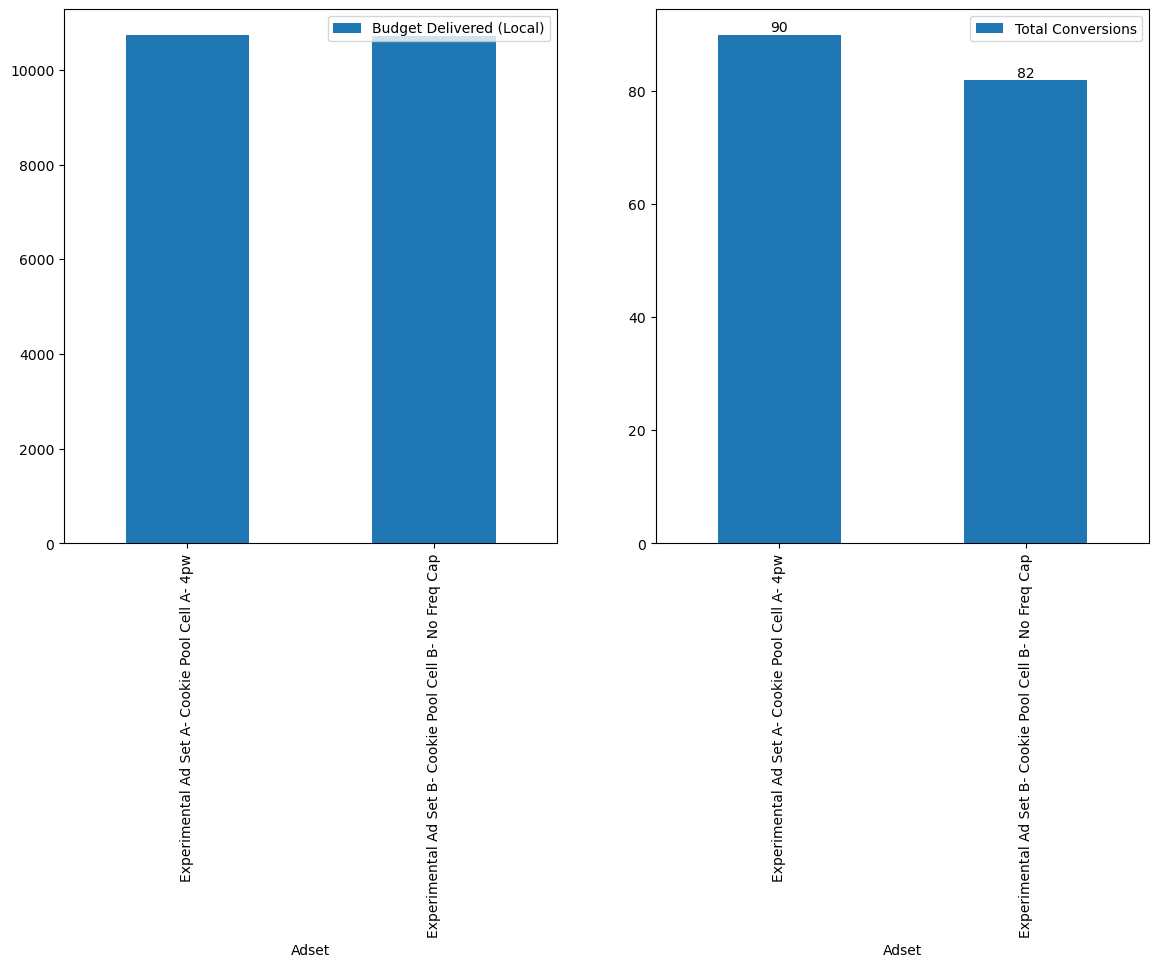

In [47]:

for market in del_data_mark_test1['Matched Market Test Group'].unique():
    fig, axes = plt.subplots(1, 2, figsize=(14,6))
    plt.subplots_adjust(top=1)  

        
    del_data_test=del_data_mark_test1[del_data_mark_test1['Matched Market Test Group']==market]
    
    del_data_test.plot(x='Adset',y='Budget Delivered (Local)',kind='bar',ax=axes[0])
    del_data_test.plot(x='Adset',y='Total Conversions',kind='bar',ax=axes[1])
    
    for i, value in enumerate(del_data_test['Total Conversions']):
                    plt.text(i, value, str(value), ha='center', va='bottom')
     


#### The 4pw cap performs consistently better in all 3 areas